# Support Vector Machine (SVM)

In [1]:
import os 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('ufc.csv')

In [3]:
#Displaying the first 5 rows
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Derrick Lewis,Ciryl Gane,250,-320,250.000000,31.250000,07/08/2021,"Houston, Texas, USA",USA,Blue,...,Punches,3.0,04:11,851.0,1400.0,215.0,2200.0,600.0,330.0,120.0
1,Jose Aldo,Pedro Munhoz,-105,-115,95.238095,86.956522,07/08/2021,"Houston, Texas, USA",USA,Red,...,NaN,3.0,05:00,900.0,150.0,225.0,1600.0,900.0,450.0,450.0
2,Michael Chiesa,Vicente Luque,-115,-105,86.956522,95.238095,07/08/2021,"Houston, Texas, USA",USA,Blue,...,D'Arce Choke,1.0,03:25,205.0,225.0,300.0,350.0,650.0,900.0,300.0
3,Tecia Torres,Angela Hill,-160,140,62.500000,140.000000,07/08/2021,"Houston, Texas, USA",USA,Red,...,NaN,3.0,05:00,900.0,-105.0,180.0,1000.0,2000.0,1100.0,750.0
4,Song Yadong,Casey Kenney,105,-125,105.000000,80.000000,07/08/2021,"Houston, Texas, USA",USA,Red,...,NaN,3.0,05:00,900.0,215.0,165.0,1100.0,800.0,350.0,700.0


In [4]:
#Display last 5 rows
df.tail()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
493,John Dodson,Merab Dvalishvili,188,-240,188.000000,41.666667,8/15/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,450.0,-185.0,1500.0,1000.0,375.0,1000.0
494,Jim Miller,Vinc Pichel,100,-124,100.000000,80.645161,8/15/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,350.0,180.0,250.0,1500.0,800.0,350.0
495,Ashley Yoder,Livinha Souza,130,-162,130.000000,61.728395,8/15/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,180.0,105.0,1250.0,375.0,1600.0,625.0
496,Felice Herrig,Virna Jandiroba,240,-315,240.000000,31.746032,8/15/2020,"Las Vegas, Nevada, USA",USA,Blue,...,Armbar,NaN,NaN,NaN,350.0,105.0,2000.0,200.0,1500.0,1000.0
497,Herbert Burns,Daniel Pineda,-286,225,34.965035,225.000000,8/15/2020,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,NaN,NaN,NaN,575.0,700.0,-125.0,900.0,500.0,425.0


In [5]:
#Display number of rows and columns
df.shape

(498, 119)

In [6]:
#Checking number of null values
df.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    7
r_sub_odds    8
b_sub_odds    7
r_ko_odds     8
b_ko_odds     7
Length: 119, dtype: int64

In [7]:
#Replacing null values with 0
df.fillna(0, inplace=True)

In [8]:
#Checking sum values again
df.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    0
r_sub_odds    0
b_sub_odds    0
r_ko_odds     0
b_ko_odds     0
Length: 119, dtype: int64

In [9]:
#Categorical features
cat_features = ['R_fighter','B_fighter', 'date', 'location','country', 'title_bout', 'weight_class' ,
                'gender', 'B_Stance', 'R_Stance', 'better_rank', 'finish_round_time' ,'finish_details', 'finish']

In [10]:
#One-hot encoding
new_df = pd.get_dummies(df, columns = cat_features)
print(df.shape)        #Original dataframe shape
print(new_df.shape)    #new dataframe shape

new_df['Winner'][new_df['Winner'] == 'Blue'] = 1   #if Blue wins display 1
new_df['Winner'][new_df['Winner'] == 'Red'] = 0    #if Red wins display 0

new_df.head()  #First 5 rows of new dataframe

(498, 119)
(498, 1021)


<ipython-input-10-64de7e6dd28e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Winner'][new_df['Winner'] == 'Blue'] = 1   #if Blue wins display 1
<ipython-input-10-64de7e6dd28e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Winner'][new_df['Winner'] == 'Red'] = 0    #if Red wins display 0


,R_odds,B_odds,R_ev,B_ev,Winner,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,finish_details_Punch,finish_details_Punches,finish_details_Rear Naked Choke,finish_0,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_S-DEC,finish_SUB,finish_U-DEC
0,250,-320,250.000000,31.250000,1,5,0,6,0,5.37,...,0,1,0,0,0,1,0,0,0,0
1,-105,-115,95.238095,86.956522,0,3,0,1,0,5.55,...,0,0,0,0,0,0,0,0,0,1
2,-115,-105,86.956522,95.238095,1,3,0,3,0,5.65,...,0,0,0,0,0,0,0,0,1,0
3,-160,140,62.500000,140.000000,0,3,0,1,0,5.71,...,0,0,0,0,0,0,0,0,0,1
4,105,-125,105.000000,80.000000,0,3,1,0,0,4.85,...,0,0,0,0,0,0,0,1,0,0


In [11]:
#Setting X and Y values
X = new_df.drop('Winner', axis=1).values
y = new_df['Winner']


y = y.astype(int)   #Changing y to integer values



print(X.shape)     #Comparing X and y shapes
print(y.shape)

(498, 1020)
(498,)


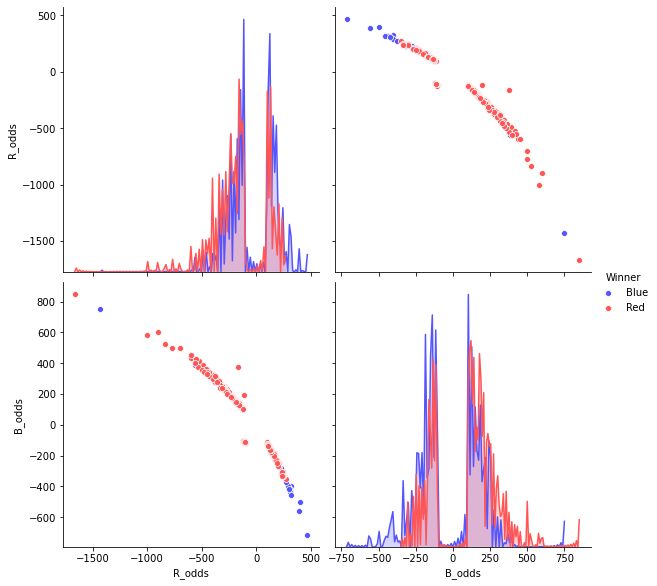

In [12]:
#Limiting the data
df2 = df[['R_odds', 'B_odds', 'Winner'] ]   #Comparing these 3 features to see if there's correlation



# Visualize the data using seaborn Pairplots
g = sns.pairplot(df2, hue = 'Winner', palette = 'seismic' , diag_kws={'bw': 0.2}, height = 4)

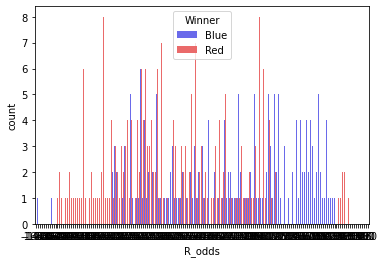

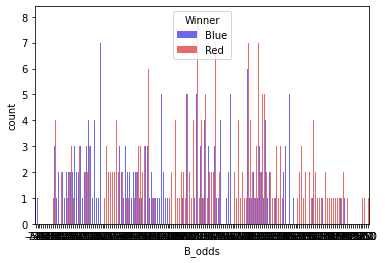

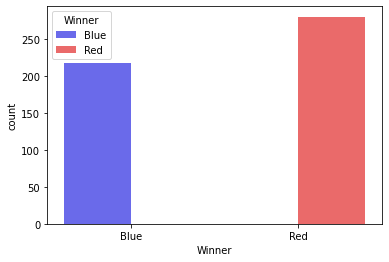

In [13]:
#Investigate all the 'R_odds' and 'B_odds' features by our y

features = ['R_odds', 'B_odds', 'Winner']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df2, hue = 'Winner', palette="seismic")

In [24]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [25]:
#Support Vector Machine Classifier
clf_svm = svm.SVC(kernel='rbf', C=30, gamma='auto')
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_train) #Predicts y from training data

In [26]:
#Accuracy on Train data
print("Training dataset accuracy is:", clf_svm.score(X_train, y_train))

#Accuracy on Test data
print("Testing dataset accuracy is:", clf_svm.score(X_test, y_test))

Training dataset accuracy is: 1.0
Testing dataset accuracy is: 0.608


In [27]:
#Confusion Matrix Function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes,cmap='RdPu', yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30},
                   fmt='g')
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

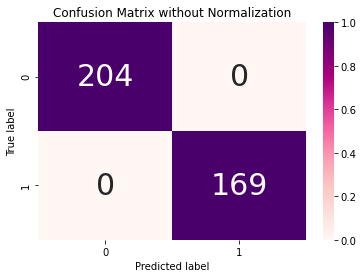

In [28]:
#Plotting confusion matrix without normalization
cm = confusion_matrix(y_train, y_pred)

plot_confusion_matrix(cm, classes = clf_svm.classes_, title = "Confusion Matrix without Normalization")

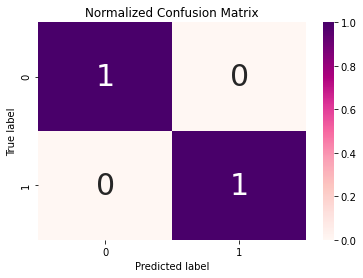

In [29]:
#Plotting confusion matrix with normalization
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = clf_svm.classes_, title = "Normalized Confusion Matrix")

In [30]:
#Calculating False Positive(FP), False Negative(FN), True Positive(TP) and True Negative(TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum()- (FP + FN + TP)

#Sensitivity, hit rate, recall or True positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is: ", TPR)

#Precision or Positive predictive value
PPV = TP / (TP+ FP)
print("The Precision is: ", PPV)

#False positive rate
FPR = FP / (FP + TN)
print("The False Positive rate is: ", FPR)

#False Negative rate
FNR = FN / (FN + TP)
print("The False Negative rate is: ", FNR)

#Averages:
print("")
print("The average TPR is: ", TPR.sum()/2)
print("The average Precision rate is: " , PPV.sum()/2)
print("The False Positive rate is: " , FPR.sum()/2)
print("The False Negative rate is: " , FNR.sum()/2)

The True Positive Rate is:  [1. 1.]
The Precision is:  [1. 1.]
The False Positive rate is:  [0. 0.]
The False Negative rate is:  [0. 0.]

The average TPR is:  1.0
The average Precision rate is:  1.0
The False Positive rate is:  0.0
The False Negative rate is:  0.0


In [20]:
#GridSearchCV to find the optimal parameters for the classifier
clf = GridSearchCV(svm.SVC(),{
    'C':[1,10,100],
    'kernel':['rbf', 'linear']
}, cv=5, return_train_score=False)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([5.97e-03, 5.06e-01, 8.91e-03, 5.12e+00, 4.04e-03, 5.04e+01]),
 'std_fit_time': array([1.92e-03, 5.60e-01, 6.85e-04, 6.29e+00, 4.96e-05, 5.72e+01]),
 'mean_score_time': array([0.  , 0.  , 0.01, 0.  , 0.  , 0.  ]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'linear'}],
 'split0_test_score': array([0.6 , 0.6 , 0.6 , 0.6 , 0.65, 0.6 ]),
 'split1_test_score': array([0.45, 0.5 , 0.45, 0.5 , 0.45, 0.5 ]),
 '

In [21]:
#Printing best parameters
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [ ]:
#Applying optimal parameters
clf_svm = svm.SVC(kernel='linear', C=1, gamma='auto')
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

In [33]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.61


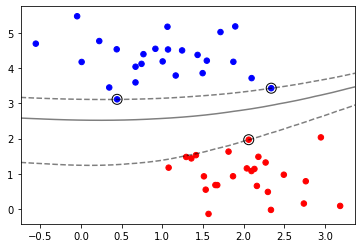

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.bwr)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()